<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/08.%20Chapter%2008/chapter_08_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8: Dimensionality Reduction

Notebook ini mereproduksi dan menjelaskan isi Bab 8 dari buku _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ oleh Aurélien Géron.

##  Ringkasan Materi:

**Dimensionality Reduction** adalah proses menyederhanakan dataset berdimensi tinggi menjadi dimensi yang lebih rendah sambil tetap mempertahankan informasi penting. Tujuannya:
- Mengurangi noise dan overfitting
- Mempercepat pelatihan
- Memvisualisasikan data

### Teknik utama:
1. **PCA (Principal Component Analysis)**
   - Mencari sumbu baru (komponen utama) dengan variansi terbesar
   - Bisa digunakan untuk kompresi data

2. **Incremental PCA**
   - Untuk data besar yang tidak muat di memori

3. **Kernel PCA**
   - Untuk menangani data nonlinier dengan fungsi kernel

4. **LLE (Locally Linear Embedding)**
   - Teknik manifold learning untuk data kompleks



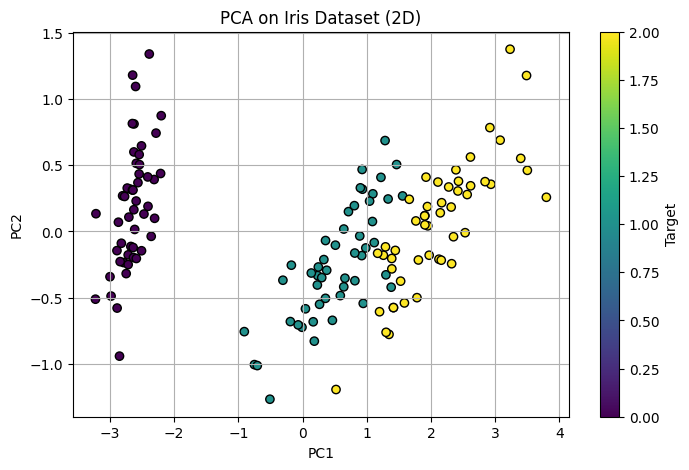

In [1]:

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dataset
iris = load_iris()
X = iris.data
y = iris.target

# PCA: 2D projek
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset (2D)")
plt.colorbar(label="Target")
plt.grid(True)
plt.show()


In [2]:

# Variansi yang dijelaskan tiap komponen
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.92461872 0.05306648]
Total variance retained: 0.9776852063187977


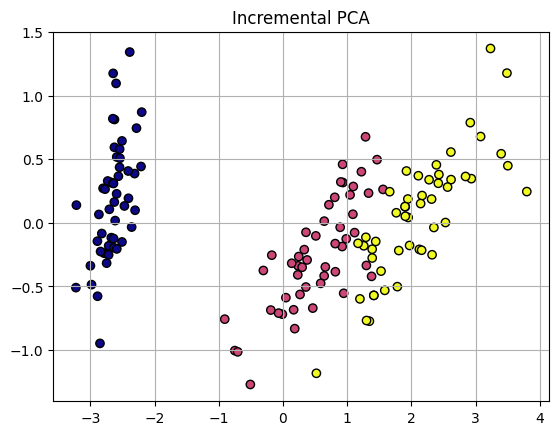

In [3]:

from sklearn.decomposition import IncrementalPCA
import numpy as np

# Simulasi incremental PCA (gunakan iris dengan batch kecil)
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X)

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.title("Incremental PCA")
plt.grid(True)
plt.show()


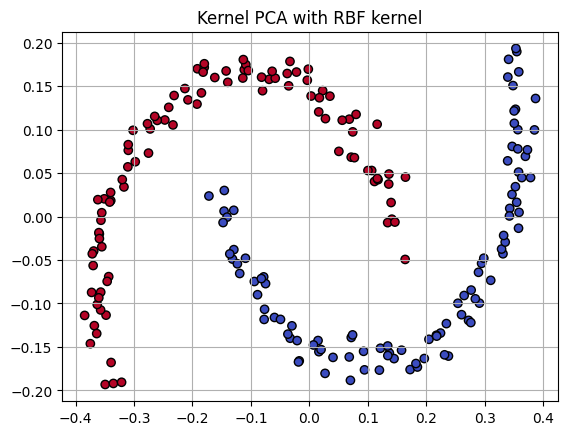

In [4]:

from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=42)
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_kpca = kpca.fit_transform(X_moon)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_moon, cmap='coolwarm', edgecolor='k')
plt.title("Kernel PCA with RBF kernel")
plt.grid(True)
plt.show()
